In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import model_selection
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
%matplotlib inline    
import warnings
warnings.filterwarnings('ignore')
plt.style.use('seaborn-darkgrid') 
from pylab import rcParams  
import plotly.graph_objs as go
import cufflinks
from statsmodels.tsa.stattools import adfuller

### Δείκτης Απασχολουμένων

Ο Δείκτης Απασχολουμένων Ατόμων στο Λιανικό Εμπόριο είναι τριμηνιαίος δείκτης, ο οποίος ανακοινώθηκε στην
Ελλάδα για πρώτη φορά το 2004, με έτος βάσης το 2000=100,0 και με αναδρομικά στοιχεία από το 1ο τρίμηνο 2000.

##### Σκοπός του δείκτη 

Σκοπός του δείκτη απασχολουμένων ατόμων είναι η μέτρηση της μεταβολής των απασχολουμένων ατόμων στο
λιανικό εμπόριο, ανά τρίμηνο. Στην κατάρτιση του δείκτη περιλαμβάνεται ο συνολικός αριθμός των ατόμων που
εργάζονται στην επιχείρηση, ανεξάρτητα από την ιδιότητα (ιδιοκτήτες, συνέταιροι και μέλη των οικογενειών τους)
και την ειδικότητά τους (διευθυντές, πωλητές, βοηθητικό προσωπικό) και ανεξάρτητα αν εργάζονται προσωρινά ή
εποχικά, με πλήρη ή μερική απασχόληση, με αμοιβή ή χωρίς αμοιβή.

In [14]:
df= pd.read_csv('Eξέλιξη του Δείκτη Απασχολουμένων στο Λιανικό Εμπόριο.csv')
df.head(5)

,Year-Month,General Index,General Index (excluding motor fuel sector),Index in the food industry,General Index (excluding food and fuel sectors)
0,2000/01,"90,5","88,3","73,8","108,0"
1,2000/04,"90,5","89,5","74,6","109,7"
2,2000/07,"90,0","88,6","72,7","110,8"
3,2000/10,"89,3","89,6","72,7","113,8"
4,2001/01,"91,2","89,0","72,5","112,4"


In [15]:
df['Date'] =  pd.to_datetime(df['Year-Month'], format='%Y%m', errors='ignore', infer_datetime_format=True)
df.drop(['Year-Month'], inplace=True, axis=1)
df

,General Index,General Index (excluding motor fuel sector),Index in the food industry,General Index (excluding food and fuel sectors),Date
0,"90,5","88,3","73,8","108,0",2000-01-01
1,"90,5","89,5","74,6","109,7",2000-04-01
2,"90,0","88,6","72,7","110,8",2000-07-01
3,"89,3","89,6","72,7","113,8",2000-10-01
4,"91,2","89,0","72,5","112,4",2001-01-01
...,...,...,...,...,...
85,"106,8","107,0","116,3","97,0",2021-04-01
86,"107,2","107,8","117,1","97,8",2021-07-01
87,"108,5","109,1","115,2","102,6",2021-10-01
88,"105,6","106,2","112,8","99,1",2022-01-01


In [16]:
df.isnull().sum()

General Index                                      0
General Index (excluding motor fuel sector)        0
Index in the food industry                         0
General Index (excluding food and fuel sectors)    0
Date                                               0
dtype: int64

In [18]:
df.dtypes

General Index                                              object
General Index (excluding motor fuel sector)                object
Index in the food industry                                 object
General Index (excluding food and fuel sectors)            object
Date                                               datetime64[ns]
dtype: object

In [23]:
df = df.replace(',', '.', regex=True)

In [27]:
df['General Index'] = pd.to_numeric(df['General Index'],errors = 'coerce')
df['General Index (excluding motor fuel sector)'] = pd.to_numeric(df['General Index (excluding motor fuel sector)'],errors = 'coerce')
df['Index in the food industry'] = pd.to_numeric(df['Index in the food industry'],errors = 'coerce')
df['General Index (excluding food and fuel sectors)'] = pd.to_numeric(df['General Index (excluding food and fuel sectors)'],errors = 'coerce')

In [28]:
df

,General Index,General Index (excluding motor fuel sector),Index in the food industry,General Index (excluding food and fuel sectors),Date
0,90.5,88.3,73.8,108.0,2000-01-01
1,90.5,89.5,74.6,109.7,2000-04-01
2,90.0,88.6,72.7,110.8,2000-07-01
3,89.3,89.6,72.7,113.8,2000-10-01
4,91.2,89.0,72.5,112.4,2001-01-01
...,...,...,...,...,...
85,106.8,107.0,116.3,97.0,2021-04-01
86,107.2,107.8,117.1,97.8,2021-07-01
87,108.5,109.1,115.2,102.6,2021-10-01
88,105.6,106.2,112.8,99.1,2022-01-01


Text(0.5, 1.0, 'Δείκτης Απασχολουμένων με την πάροδο του χρόνου')

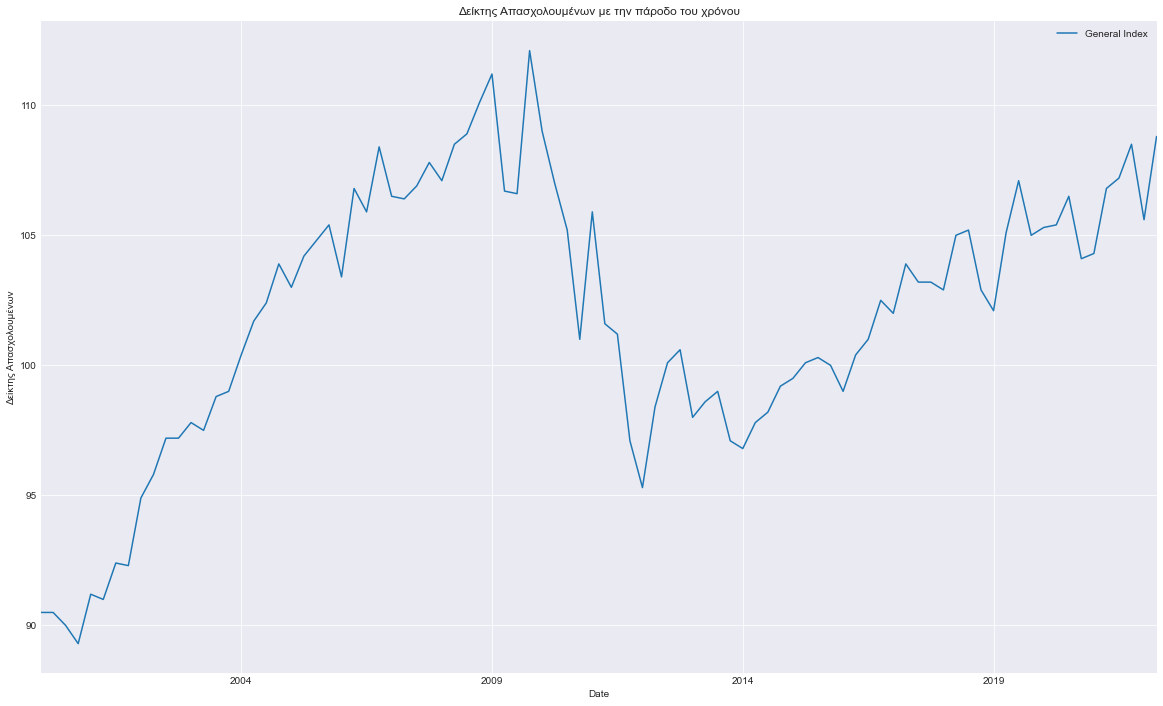

In [30]:
rcParams['figure.figsize'] = 20, 12
df.plot(x = 'Date', y = 'General Index')
plt.xlabel('Date')
plt.ylabel('Γενικός Δείκτης Απασχολουμένων')
plt.title("Δείκτης Απασχολουμένων με την πάροδο του χρόνου")

Text(0.5, 1.0, 'Γενικός Δείκτης (εξαιρουμένου του τομέα καυσίμων κίνησης) με την πάροδο του χρόνου')

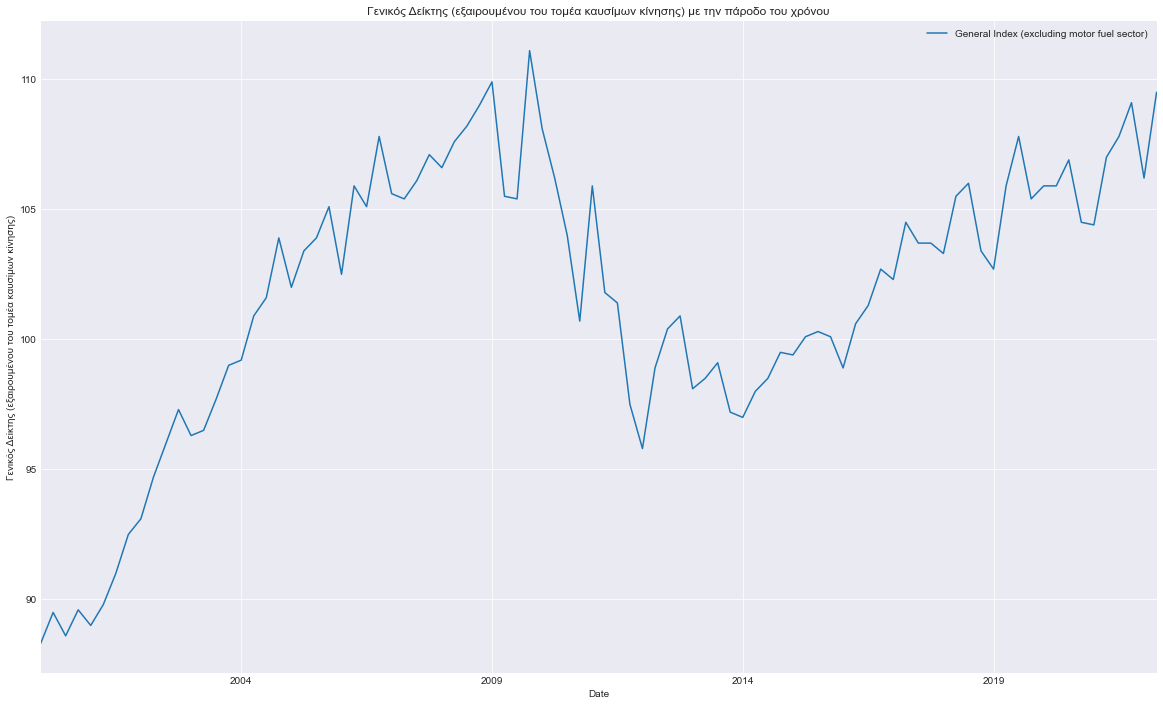

In [32]:
rcParams['figure.figsize'] = 20, 12
df.plot(x = 'Date', y = 'General Index (excluding motor fuel sector)')
plt.xlabel('Date')
plt.ylabel('Γενικός Δείκτης (εξαιρουμένου του τομέα καυσίμων κίνησης)')
plt.title("Γενικός Δείκτης (εξαιρουμένου του τομέα καυσίμων κίνησης) με την πάροδο του χρόνου")

Text(0.5, 1.0, 'Δείκτης στη βιομηχανία τροφίμων με την πάροδο του χρόνου')

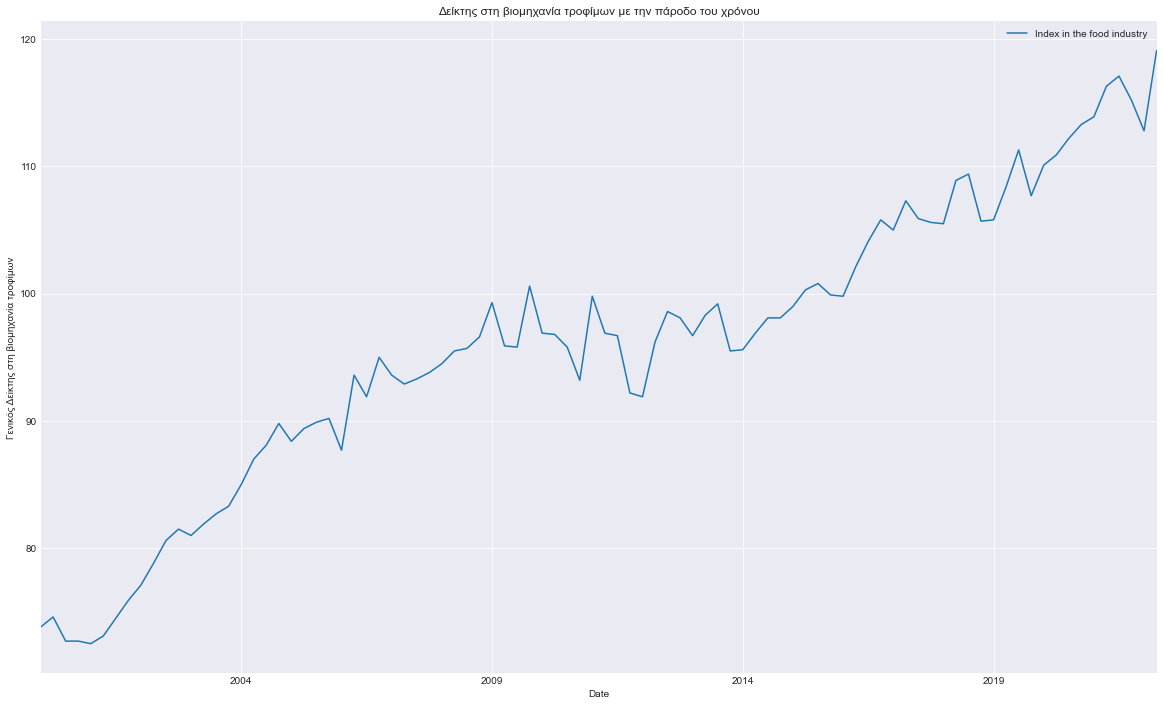

In [33]:
rcParams['figure.figsize'] = 20, 12
df.plot(x = 'Date', y = 'Index in the food industry')
plt.xlabel('Date')
plt.ylabel('Γενικός Δείκτης στη βιομηχανία τροφίμων')
plt.title("Δείκτης στη βιομηχανία τροφίμων με την πάροδο του χρόνου")

Text(0.5, 1.0, 'Γενικός Δείκτης (εξαιρουμένων των τομέων τροφίμων και καυσίμων) με την πάροδο του χρόνου')

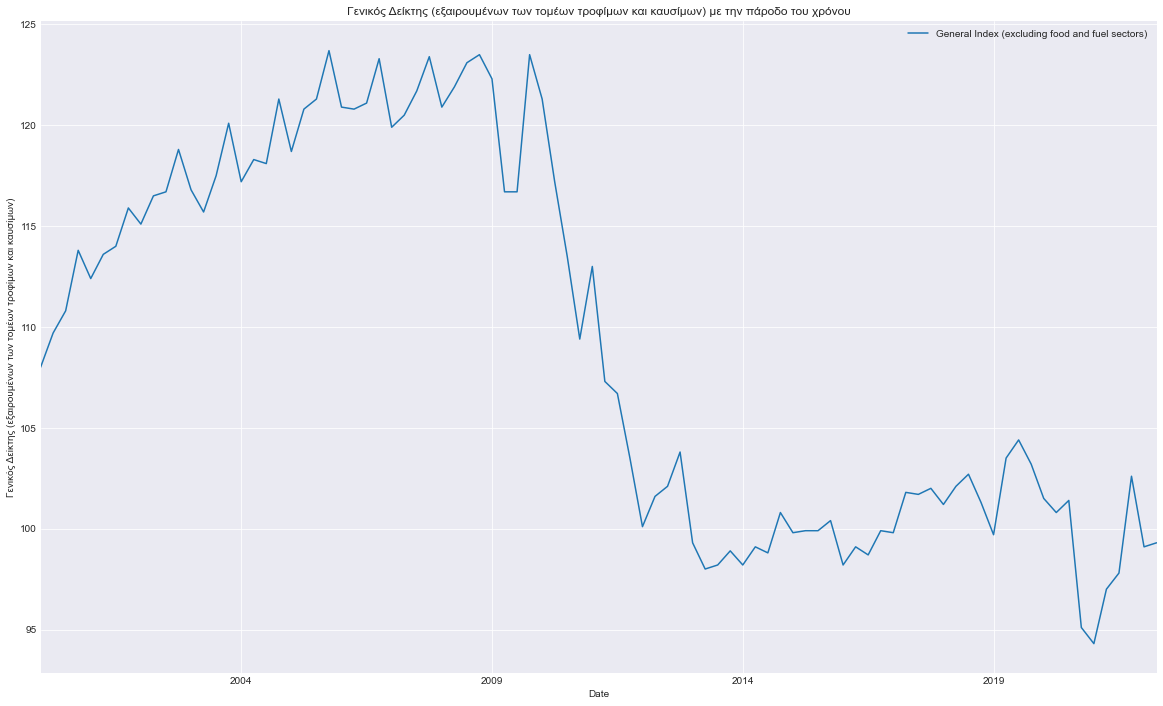

In [34]:
rcParams['figure.figsize'] = 20, 12
df.plot(x = 'Date', y = 'General Index (excluding food and fuel sectors)')
plt.xlabel('Date')
plt.ylabel('Γενικός Δείκτης (εξαιρουμένων των τομέων τροφίμων και καυσίμων)')
plt.title("Γενικός Δείκτης (εξαιρουμένων των τομέων τροφίμων και καυσίμων) με την πάροδο του χρόνου")